# สมาชิกกลุ่ม
- จิตติณณ์ จินดานรเศรษฐ์ 6110405949 (หัวหน้ากลุ่ม)
- รินลณี วัชรนิมมานกุล 6110401633
- กัญญาณัฐ อินทรโชติ 6110402737
- ณัฐณิชา คงสุนทร 6110402753
- นิรัติศัย คงศักดิ์ 6110406066
- พิมพ์ลภัส ตันธนกุล 6110406171
- สุรยุทธ์ บุญคล้าย 6110406252

---

# นำเข้าข้อมูล

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('cmc.data', header=None)

In [3]:
df.columns = ['wife_age', 'wife_edu', 'husband_edu', 'children', 'wife_islam', 'wife_working', 'husband_job', 'living_index', 'media_exposure', 'method']

In [4]:
df

,wife_age,wife_edu,husband_edu,children,wife_islam,wife_working,husband_job,living_index,media_exposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age          1473 non-null int64
wife_edu          1473 non-null int64
husband_edu       1473 non-null int64
children          1473 non-null int64
wife_islam        1473 non-null int64
wife_working      1473 non-null int64
husband_job       1473 non-null int64
living_index      1473 non-null int64
media_exposure    1473 non-null int64
method            1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


# Preprocessing

In [6]:
df.wife_edu = pd.Categorical(df.wife_edu).rename_categories({1:'low', 2:'mid-low', 3:'mid-high', 4:'high'})
df.husband_edu = pd.Categorical(df.husband_edu).rename_categories({1:'low', 2:'mid-low', 3:'mid-high', 4:'high'})
df.husband_job = pd.Categorical(df.husband_job)
df.living_index =  pd.Categorical(df.living_index).rename_categories({1:'low', 2:'mid-low', 3:'mid-high', 4:'high'})
df.method =  pd.Categorical(df.method).rename_categories({1:'No-use', 2:'Long-term', 3:'Short-term'})

In [7]:
df.wife_islam = df.wife_islam.astype(bool)
df.wife_working = df.wife_working.astype(bool)
df.media_exposure = df.media_exposure.astype(bool)

In [8]:
df.wife_age = pd.cut(df.wife_age, bins=[0,17,31,46,100], right=False, 
                labels=["Children", "Young", "Middle", "Old"])

In [9]:
x = df['children'].values.reshape(-1, 1)
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['children'] = x_scaled

In [10]:
df

,wife_age,wife_edu,husband_edu,children,wife_islam,wife_working,husband_job,living_index,media_exposure,method
0,Young,mid-low,mid-high,0.1875,True,True,2,mid-high,False,No-use
1,Middle,low,mid-high,0.6250,True,True,3,high,False,No-use
2,Middle,mid-low,mid-high,0.4375,True,True,3,high,False,No-use
3,Middle,mid-high,mid-low,0.5625,True,True,3,mid-high,False,No-use
4,Middle,mid-high,mid-high,0.5000,True,True,3,mid-low,False,No-use
...,...,...,...,...,...,...,...,...,...,...
1468,Middle,high,high,0.1250,True,False,2,high,False,Short-term
1469,Middle,high,high,0.1875,True,True,1,high,False,Short-term
1470,Middle,mid-high,mid-high,0.5000,True,False,1,high,False,Short-term
1471,Middle,mid-high,mid-high,0.2500,True,False,2,mid-low,False,Short-term


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age          1473 non-null category
wife_edu          1473 non-null category
husband_edu       1473 non-null category
children          1473 non-null float64
wife_islam        1473 non-null bool
wife_working      1473 non-null bool
husband_job       1473 non-null category
living_index      1473 non-null category
media_exposure    1473 non-null bool
method            1473 non-null category
dtypes: bool(3), category(6), float64(1)
memory usage: 25.6 KB


# เรียนรู้ข้อมูล และทำนายผล

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = pd.get_dummies(df.loc[:, 'wife_age':'media_exposure'])
y = df.method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

## DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
param_grid = { 
 'max_depth' : [2,3,4,5,6,7,8,9,10],
 'criterion' :['gini', 'entropy'],
 'max_features' : ['auto', 'sqrt', 'log2', None]
}

In [17]:
DTree = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(estimator=DTree, param_grid=param_grid, cv= 3, n_jobs=-1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [18]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': None}

In [19]:
DTree = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
DTree.fit(X_train, y_train)
DTree.score(X_test,y_test)

0.5796610169491525

In [20]:
from graphviz import Source
from sklearn.tree import export_graphviz

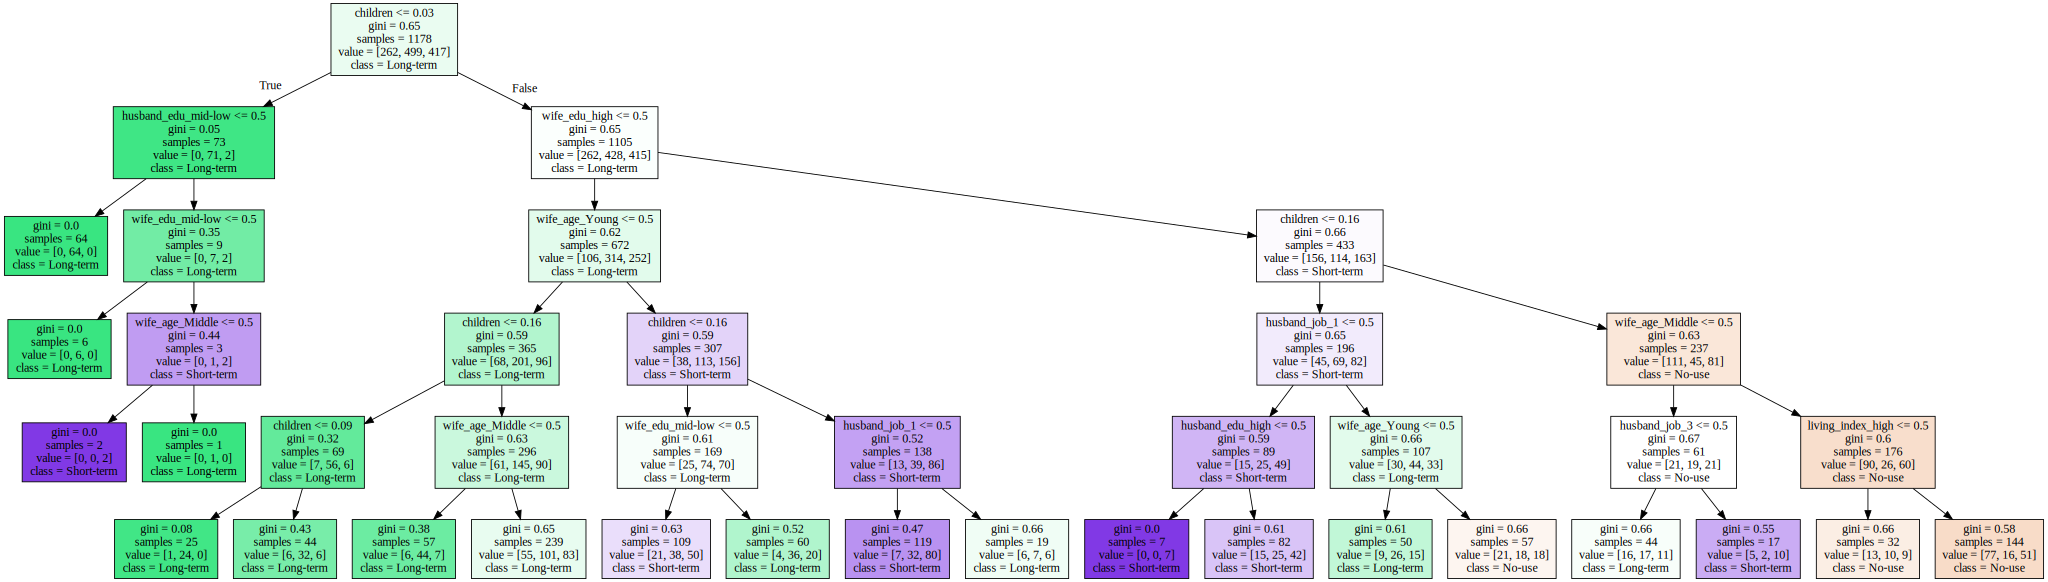

In [21]:
Source(export_graphviz(DTree, out_file=None, 
                       feature_names=X.columns, class_names=df.method.unique(),
                       filled=True, precision=2))

## KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
param_grid = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [24]:
knn = KNeighborsClassifier()
gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 3, n_jobs=-1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [26]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='uniform')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.49491525423728816

## MLPClassifier

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [29]:
mlp = MLPClassifier()
gscv = GridSearchCV(estimator=mlp, param_grid=param_grid, cv= 3, n_jobs=-1)
gscv.fit(X_train, y_train)

C:\Users\tinti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [30]:
gscv.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [31]:
mlp = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate='adaptive', solver='adam')
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

C:\Users\tinti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5661016949152542